# Figures
This notebook contains the code necessary to generate all the figures from DOI and all the necessary files can be found in the `data` directory.  
First we will load all the necessary packages for our figures.

In [1]:
# Load dependicies.
from matplotlib.collections import BrokenBarHCollection
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as stats

## Figure 1. Phenology

First let's load the data and inspect our data.

In [2]:
# Load the phenology data into a Pandas dataframe.
phenology_long_df = pd.read_csv('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/data/phenology_data.csv')
# Create the date column.
phenology_long_df['date'] = phenology_long_df['month']+'-'+phenology_long_df['year'].apply(str)
# Make the date column ordered.
phenology_long_df['date'] = pd.Categorical(
    phenology_long_df['date'],
    [
        'JAN-2018', 'FEB-2018', 'MAR-2018',
        'APR-2018', 'MAY-2018', 'JUN-2018',
        'JUL-2018', 'AUG-2018', 'SEP-2018',
        'OCT-2018', 'NOV-2018', 'DEC-2018',
        'JAN-2019', 'FEB-2019', 'MAR-2019',
        'APR-2019', 'MAY-2019', 'JUN-2019',
        'JUL-2019', 'AUG-2019', 'SEP-2019',
        'OCT-2019', 'NOV-2019', 'DEC-2019',
        'JAN-2020', 'FEB-2020', 'MAR-2020',
    ],
    ordered=True,
)
# Visually inspect the phenology data.
phenology_long_df

,species,month,year,count,type,date
0,Ficus clamydocarpa fernandesiana,JAN,2018,5,Fruit,JAN-2018
1,Ficus kamerounesis,JAN,2018,0,Fruit,JAN-2018
2,Ficus mucoso,JAN,2018,1,Fruit,JAN-2018
3,Sapium ellipticum,JAN,2018,3,Fruit,JAN-2018
4,Croton stelluifer,JAN,2018,13,Fruit,JAN-2018
...,...,...,...,...,...,...
481,D. yakuba_Obo,MAR,2020,31,Drosophila,MAR-2020
482,D. santomea_BS,MAR,2020,7,Drosophila,MAR-2020
483,F1_BS,MAR,2020,0,Drosophila,MAR-2020
484,D. yakuba_BS,MAR,2020,22,Drosophila,MAR-2020


In [3]:
# Convert the dataframe to a wide format.
phenology_wide_df = phenology_long_df.pivot_table(
    index=['date'],
    columns='species',
    values='count',
)
# Visually inspect the phenology data.
phenology_wide_df

species,Antidesma vogelianum,Croton stelluifer,D. santomea_BS,D. santomea_Obo,D. yakuba_BS,D. yakuba_MC,D. yakuba_Obo,F1_BS,F1_Obo,Ficus clamydocarpa fernandesiana,Ficus kamerounesis,Ficus mucoso,Homalium henriquesii,Psidium guajava,Psydrax acutiflora,Psydrax subcordata,Sabicea ingrata ingrata,Sapium ellipticum
date,,,,,,,,,,,,,,,,,,
JAN-2018,45,13,11,27,35,45,25,0,0,5,0,1,0,11,0,60,23,3
FEB-2018,102,10,42,111,22,66,24,4,7,35,12,4,4,14,56,56,65,4
MAR-2018,83,14,13,98,43,10,86,2,2,33,24,13,4,10,71,44,48,16
APR-2018,22,1,2,14,22,23,31,1,0,12,3,4,14,5,11,14,12,0
MAY-2018,13,5,6,20,8,44,13,0,3,6,14,0,5,11,10,10,13,11
JUN-2018,0,6,0,19,11,13,5,0,0,1,0,1,9,5,0,0,0,2
JUL-2018,0,0,0,12,5,56,2,0,1,0,0,0,6,0,4,5,0,0
AUG-2018,0,0,1,19,6,0,7,0,0,0,0,0,0,6,5,0,0,0
SEP-2018,0,3,11,78,6,19,54,1,0,24,1,0,5,3,1,33,2,0


Next we will calculating rolling three month correlation between the abundance of _F. clamydocarpa fernandesiana_ and _D. santomea_.

In [4]:
# Calculate the rolling Pearson's correlation coefficient for each three month period.
f_clam_d_san_bs_r_corr = phenology_wide_df['Ficus clamydocarpa fernandesiana'].rolling(3, min_periods=1).corr(phenology_wide_df['D. santomea_BS'], method='pearson').fillna(method='bfill')
f_clam_d_san_obo_r_corr = phenology_wide_df['Ficus clamydocarpa fernandesiana'].rolling(3, min_periods=1).corr(phenology_wide_df['D. santomea_Obo'], method='pearson').fillna(method='bfill')

Now we will convert the phenology dataframe into tables for plotting.

In [5]:
# Tree phenology table.
phenology_wide_fruit = phenology_long_df[phenology_long_df.type == 'Fruit'].pivot_table(
    index=['date'],
    columns='species',
    values='count',
)
# Drosophila phenology table.
phenology_wide_dros = phenology_long_df[phenology_long_df.type == 'Drosophila'].pivot_table(
    index=['date'],
    columns='species',
    values='count',
)

Finally it is time to plot!

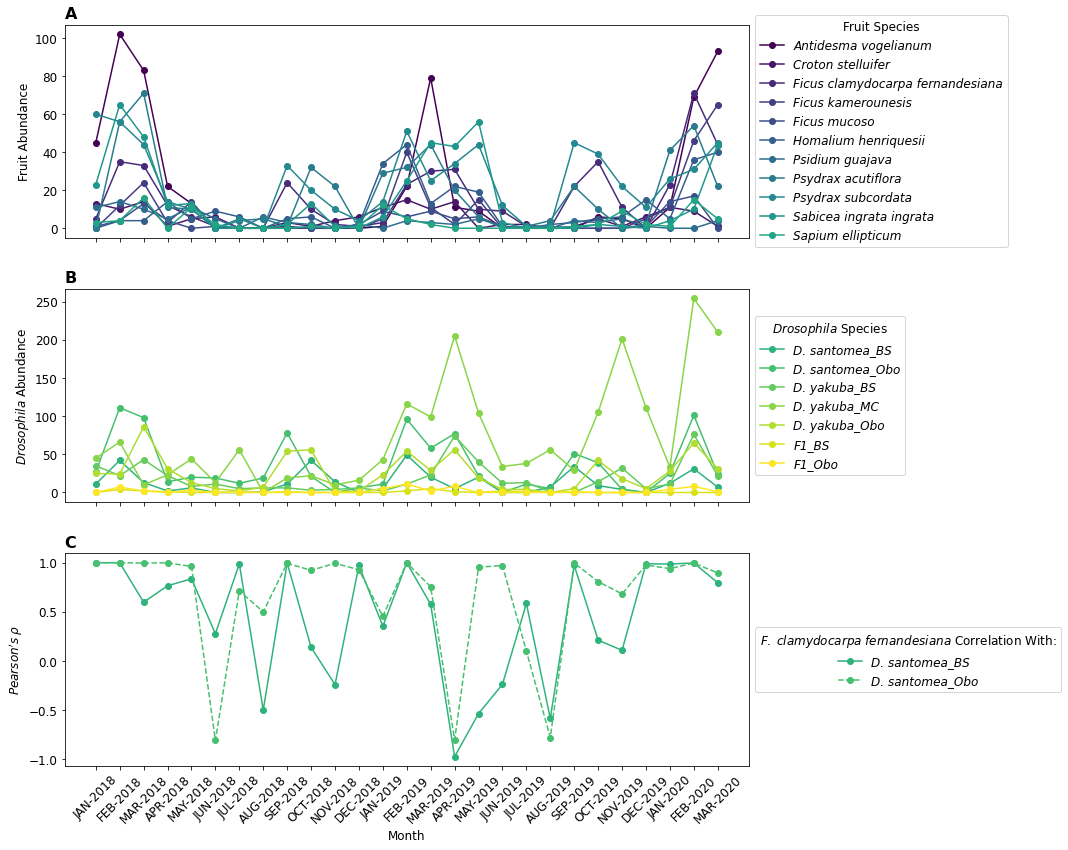

In [9]:
# Define the colormap and specific color indicies.
phenology_colors = cm.get_cmap('viridis', 18)
fruit_colors = ListedColormap(phenology_colors(range(18))[0:11])
dros_colors = ListedColormap(phenology_colors(range(18))[11:])
d_san_bs_color = ListedColormap(phenology_colors(range(18))[11])
d_san_obo_color = ListedColormap(phenology_colors(range(18))[12])
# Define the x-axis tick labels.
x_axis_phenology = [
    'JAN-2018', 'FEB-2018', 'MAR-2018',
    'APR-2018', 'MAY-2018', 'JUN-2018',
    'JUL-2018', 'AUG-2018', 'SEP-2018',
    'OCT-2018', 'NOV-2018', 'DEC-2018',
    'JAN-2019', 'FEB-2019', 'MAR-2019',
    'APR-2019', 'MAY-2019', 'JUN-2019',
    'JUL-2019', 'AUG-2019', 'SEP-2019',
    'OCT-2019', 'NOV-2019', 'DEC-2019',
    'JAN-2020', 'FEB-2020', 'MAR-2020',
]
# Plot!
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
phenology_wide_fruit.plot(ax=axes[0], marker='o', colormap=fruit_colors)
phenology_wide_dros.plot(ax=axes[1], marker='o', colormap=dros_colors)
f_clam_d_san_bs_r_corr.plot(ax=axes[2], marker='o', colormap=d_san_bs_color, linestyle='solid', label='D. santomea_BS')
f_clam_d_san_obo_r_corr.plot(ax=axes[2], marker='o', colormap=d_san_obo_color, linestyle='dashed', label='D. santomea_Obo')
axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'style': 'italic'}, title='Fruit Species')
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'style': 'italic'}, title=r'$Drosophila$ Species')
axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'style': 'italic'}, title=r'$F.\;clamydocarpa\;fernandesiana$ Correlation With:')
axes[0].set_xticks(list(range(0, 27)))
axes[1].set_xticks(list(range(0, 27)))
axes[2].set_xticks(list(range(0, 27)))
axes[2].set_xticklabels(x_axis_phenology, rotation=45)
axes[2].set_xlabel('Month')
axes[0].set_ylabel('Fruit Abundance')
axes[1].set_ylabel(r'$Drosophila$ Abundance')
axes[2].set_ylabel(r"$Pearson's\;\rho$")
axes[0].set_title(label='A', loc='left', fontsize=16, fontweight='bold')
axes[1].set_title(label='B', loc='left', fontsize=16, fontweight='bold')
axes[2].set_title(label='C', loc='left', fontsize=16, fontweight='bold')
fig.tight_layout()
#plt.savefig('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/figures/figure_1_phenology.png', dpi=300)
plt.show()

## Figure 2. Eclosion
First let's load and inspect our data.

In [52]:
# Load the viability data into a Pandas dataframe.
eclosion_df = pd.read_csv('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/data/eclosion_data.csv')
# Make the substrate column ordered.
eclosion_df['substrate'] = pd.Categorical(
    eclosion_df['substrate'],
    [
        'F. c. fernandesiana', 'F. kamerounesis', 'F. mucoso',
        'A. vogelianum', 'C. stelluifer', 'H. henriquesii',
        'P. acutiflora', 'P. guajava', 'P. subcordata',
        'S. ellipticum', 'S. i. ingrata',
    ],
    ordered=True,
)
# Visually inspect the eclosion data.
eclosion_df

,substrate,replicate,count,species
0,F. c. fernandesiana,cage1,24,D. santomea
1,F. c. fernandesiana,cage1,0,D. yakuba
2,F. c. fernandesiana,cage1,13,Zaprionus
3,F. c. fernandesiana,cage1,6,montium group
4,F. c. fernandesiana,cage1,4,other
...,...,...,...,...
270,P. guajava,cage5,0,D. santomea
271,P. guajava,cage5,20,D. yakuba
272,P. guajava,cage5,57,Zaprionus
273,P. guajava,cage5,2,montium group


Now let's plot!

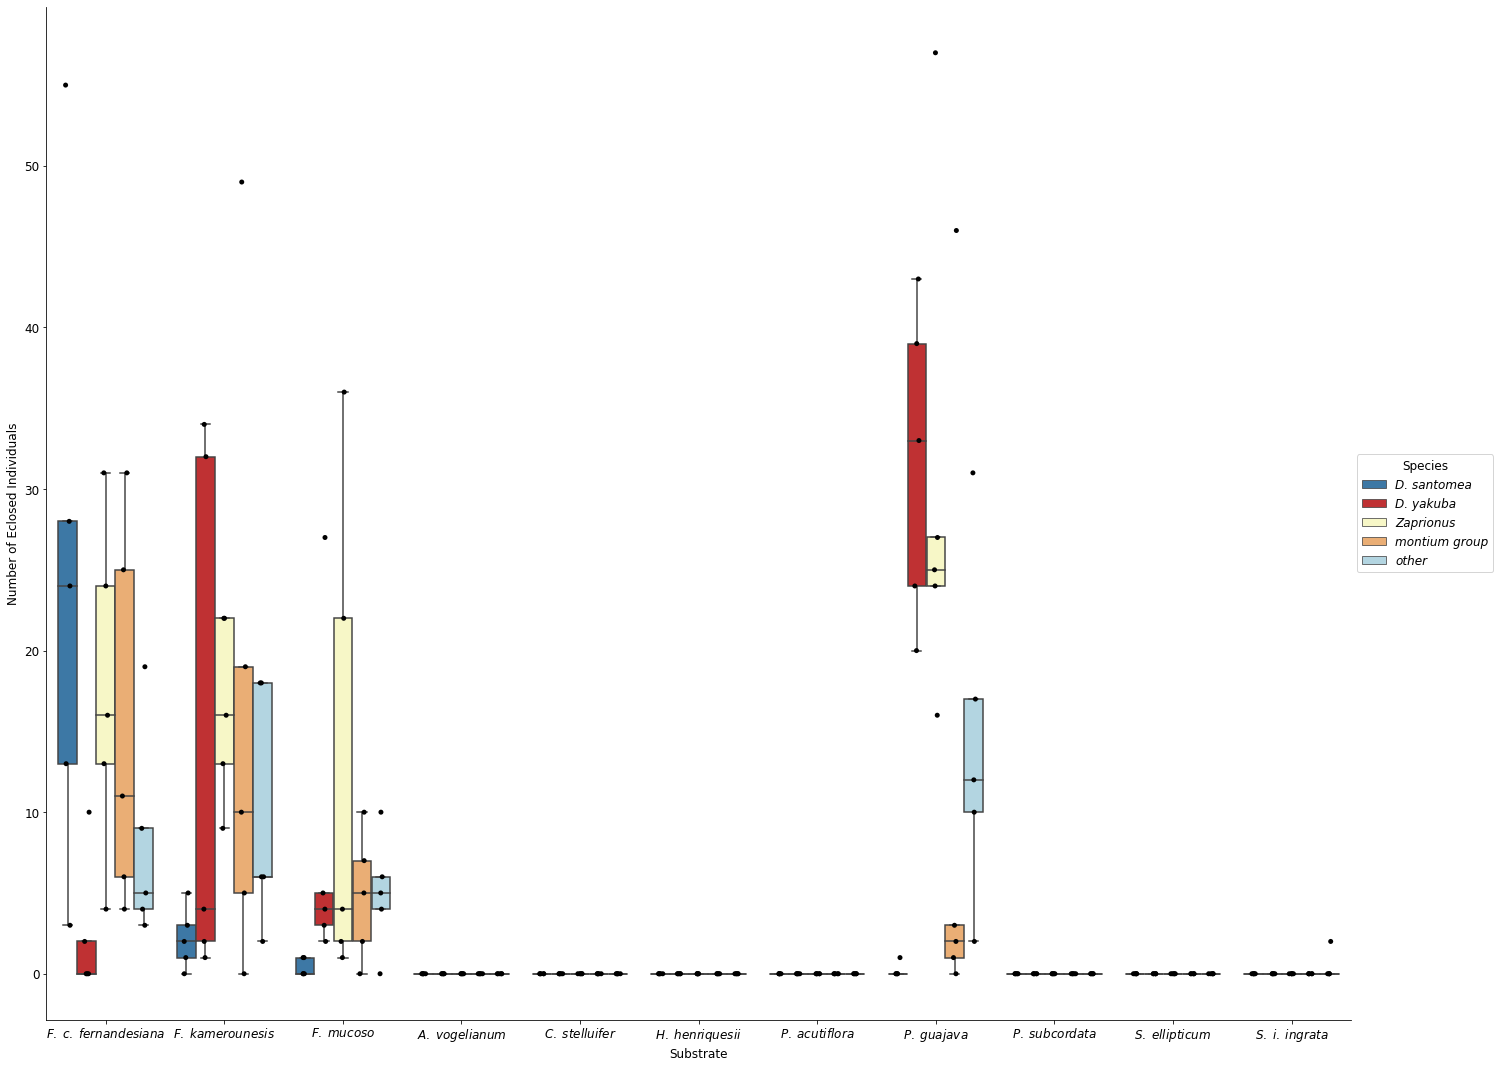

In [65]:
# Define the x-axis tick labels.
x_axis_eclosion = [
    r'$F.\;c.\;fernandesiana$', r'$F.\;kamerounesis$', r'$F.\;mucoso$',
    r'$A.\;vogelianum$', r'$C.\;stelluifer$', r'$H.\;henriquesii$',
    r'$P.\;acutiflora$', r'$P.\;guajava$', r'$P.\;subcordata$',
    r'$S.\;ellipticum$', r'$S.\;i.\;ingrata$',
]
# Plot!
fig = plt.figure(figsize=(21,15))
ax = fig.add_subplot(111)
sns.boxplot(
    data=eclosion_df,
    x='substrate',
    y='count',
    hue='species',
    palette=['#2c7bb6', '#d7191c', '#ffffbf', '#fdae61', '#abd9e9'],
    showfliers=False,

)
sns.stripplot(
    data=eclosion_df,
    x='substrate',
    y='count',
    hue='species',
    palette=['black', 'black', 'black', 'black', 'black'],
    dodge=True,
    jitter=True,
)
ax.set_xticks(list(range(0, 11)))
ax.set_xticklabels(x_axis_eclosion)
ax.set_ylabel('Number of Eclosed Individuals')
ax.set_xlabel('Substrate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:5], labels[0:5], loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'style': 'italic'}, title='Species')
fig.tight_layout()
#plt.savefig('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/figures/figure_2_eclosion.png', dpi=300)
plt.show()

## Figure 3. Viability
First let's load and inspect our data.

In [53]:
# Load the viability data into a Pandas dataframe.
viability_df = pd.read_csv('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/data/viability_data.csv')
# Make the substrate column ordered.
viability_df['substrate'] = pd.Categorical(
    viability_df['substrate'],
    [
        'Cornmeal', 'F. c. fernandesiana',
        'F. kamerounesis', 'F. mucoso',
    ],
    ordered=True,
)
# Visually inspect the viability data.
viability_df

,substrate,species,replicate,larvae,adults,proportion
0,F. kamerounesis,D. santomea,1,50,10,0.200000
1,F. mucoso,D. santomea,1,48,4,0.083333
2,Cornmeal,D. santomea,1,43,22,0.511628
3,F. c. fernandesiana,D. santomea,2,49,25,0.510204
4,F. kamerounesis,D. santomea,2,45,4,0.088889
...,...,...,...,...,...,...
135,F. mucoso,D. yakuba,17,50,11,0.220000
136,Cornmeal,D. yakuba,17,49,18,0.367347
137,F. c. fernandesiana,D. yakuba,18,50,26,0.520000
138,F. kamerounesis,D. yakuba,18,48,10,0.208333


Now let's plot!

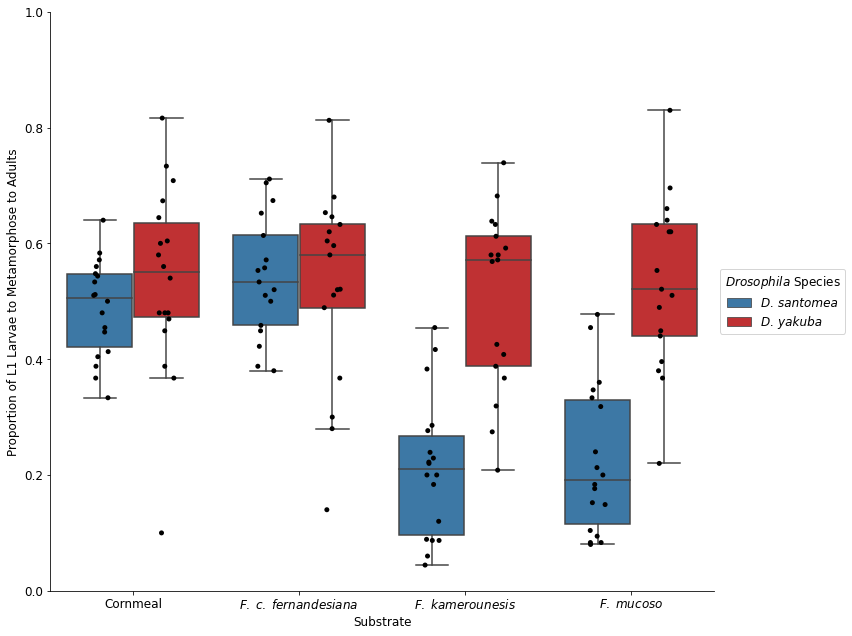

In [67]:
# Define the x-axis tick labels.
x_axis_viability = [
    'Cornmeal', r'$F.\;c.\;fernandesiana$',
    r'$F.\;kamerounesis$', r'$F.\;mucoso$',
]
# Plot!
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
sns.boxplot(
    data=viability_df,
    x='substrate',
    y='proportion',
    hue='species',
    palette=['#2c7bb6', '#d7191c'],
    showfliers=False,
)
sns.stripplot(
    data=viability_df,
    x='substrate',
    y='proportion',
    hue='species',
    palette=['black', 'black'],
    dodge=True,
    jitter=True,
)
ax.set_ylim(0, 1)
ax.set_xticks(list(range(0, 4)))
ax.set_xticklabels(x_axis_viability)
ax.set_ylabel('Proportion of L1 Larvae to Metamorphose to Adults')
ax.set_xlabel('Substrate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'style': 'italic'}, title=r'$Drosophila$ Species')
fig.tight_layout()
#plt.savefig('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/figures/figure_3_viability.png', dpi=300)
plt.show()

## Figure 4. Ideogram
First, we load and inspect the data.

In [2]:
# Load the omega results into a Pandas dataframe.
omega_df = pd.read_csv('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/data/san_yak_omega_table.csv')
omega_df

,omega_san,omega_yak,yak_FB,mel_FB,CG,symbol,seqnames,start,end,length,type
0,0.000000,NaN,FBgn0229368,FBgn0034861,CG9815,CG9815,2R,23421521,23433354,11834,genome
1,0.200000,0.117647,FBgn0067106,FBgn0035132,CG17061,mthl10,3L,332801,342915,10115,genome
2,0.500000,0.000000,FBgn0067987,FBgn0025683,CG3164,CG3164,2L,122624,130791,8168,genome
3,NaN,0.000000,FBgn0068096,FBgn0000273,CG4379,Pka-C1,2L,9682315,9699297,16983,genome
4,NaN,0.000000,FBgn0228722,FBgn0082582,CG1539,tmod,3R,30532607,30578905,46299,genome
...,...,...,...,...,...,...,...,...,...,...,...
13029,0.000000,0.000000,FBgn0242241,FBgn0027784,CG6011,Prp18,3R,19029968,19031271,1304,genome
13030,0.000000,0.000000,FBgn0230974,FBgn0032833,CG10664,CoIV,2L,19958713,19960065,1353,genome
13031,0.285714,1.000000,FBgn0242242,FBgn0260779,CG6007,gatA,3R,19026174,19028857,2684,genome
13032,0.125000,0.153846,FBgn0230972,FBgn0263873,CG43720,sick,2L,19796365,19958424,162060,genome


In [143]:
# Sort the omega values in descending order.
san_df = omega_df.sort_values(by=['omega_san'], ascending=False, na_position='last')
# Grab the top 20 to annotate.
san_top_20_df = san_df.iloc[:10]
# Extract the info for the top 20 genes.
san_top_20_omegas = san_top_20_df['omega_san'].values
san_top_20_chroms = san_top_20_df['seqnames'].values
san_top_20_genes = san_top_20_df['symbol'].values
san_top_20_idx = san_top_20_df.index.values

In [144]:
# Sort the omega values in descending order.
yak_df = omega_df.sort_values(by=['omega_yak'], ascending=False, na_position='last')
# Grab the top 20 to annotate.
yak_top_20_df = yak_df.iloc[:10]
# Extract the info for the top 20 genes.
yak_top_20_omegas = yak_top_20_df['omega_yak'].values
yak_top_20_chroms = yak_top_20_df['seqnames'].values
yak_top_20_genes = yak_top_20_df['symbol'].values
yak_top_20_idx = yak_top_20_df.index.values

In [145]:
# Define a helper function for plotting.
def chromosome_collections(df, y_positions, height, **kwargs):
    """
    Yields BrokenBarHCollection of features that can be added to an Axes
    object.
    Parameters
    ----------
    df : pandas.DataFrame
        Must at least have columns ['chrom', 'start', 'end', 'color']. If no
        column 'width', it will be calculated from start/end.
    y_positions : dict
        Keys are chromosomes, values are y-value at which to anchor the
        BrokenBarHCollection
    height : float
        Height of each BrokenBarHCollection
    Additional kwargs are passed to BrokenBarHCollection
    """
    for chrom, group in df.groupby('seqnames'):
        yrange = (y_positions[chrom], height)
        xranges = group[['start', 'length']].values
        yield BrokenBarHCollection(
            xranges, yrange, facecolors=group['colors'], **kwargs)
    return

/tmp/ipykernel_45848/823550335.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olfactory_df['colors'] = olfactory_df['type'].apply(lambda x: color_lookup[x])
/tmp/ipykernel_45848/823550335.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olfactory_df['length'] = olfactory_df['length'] * 10


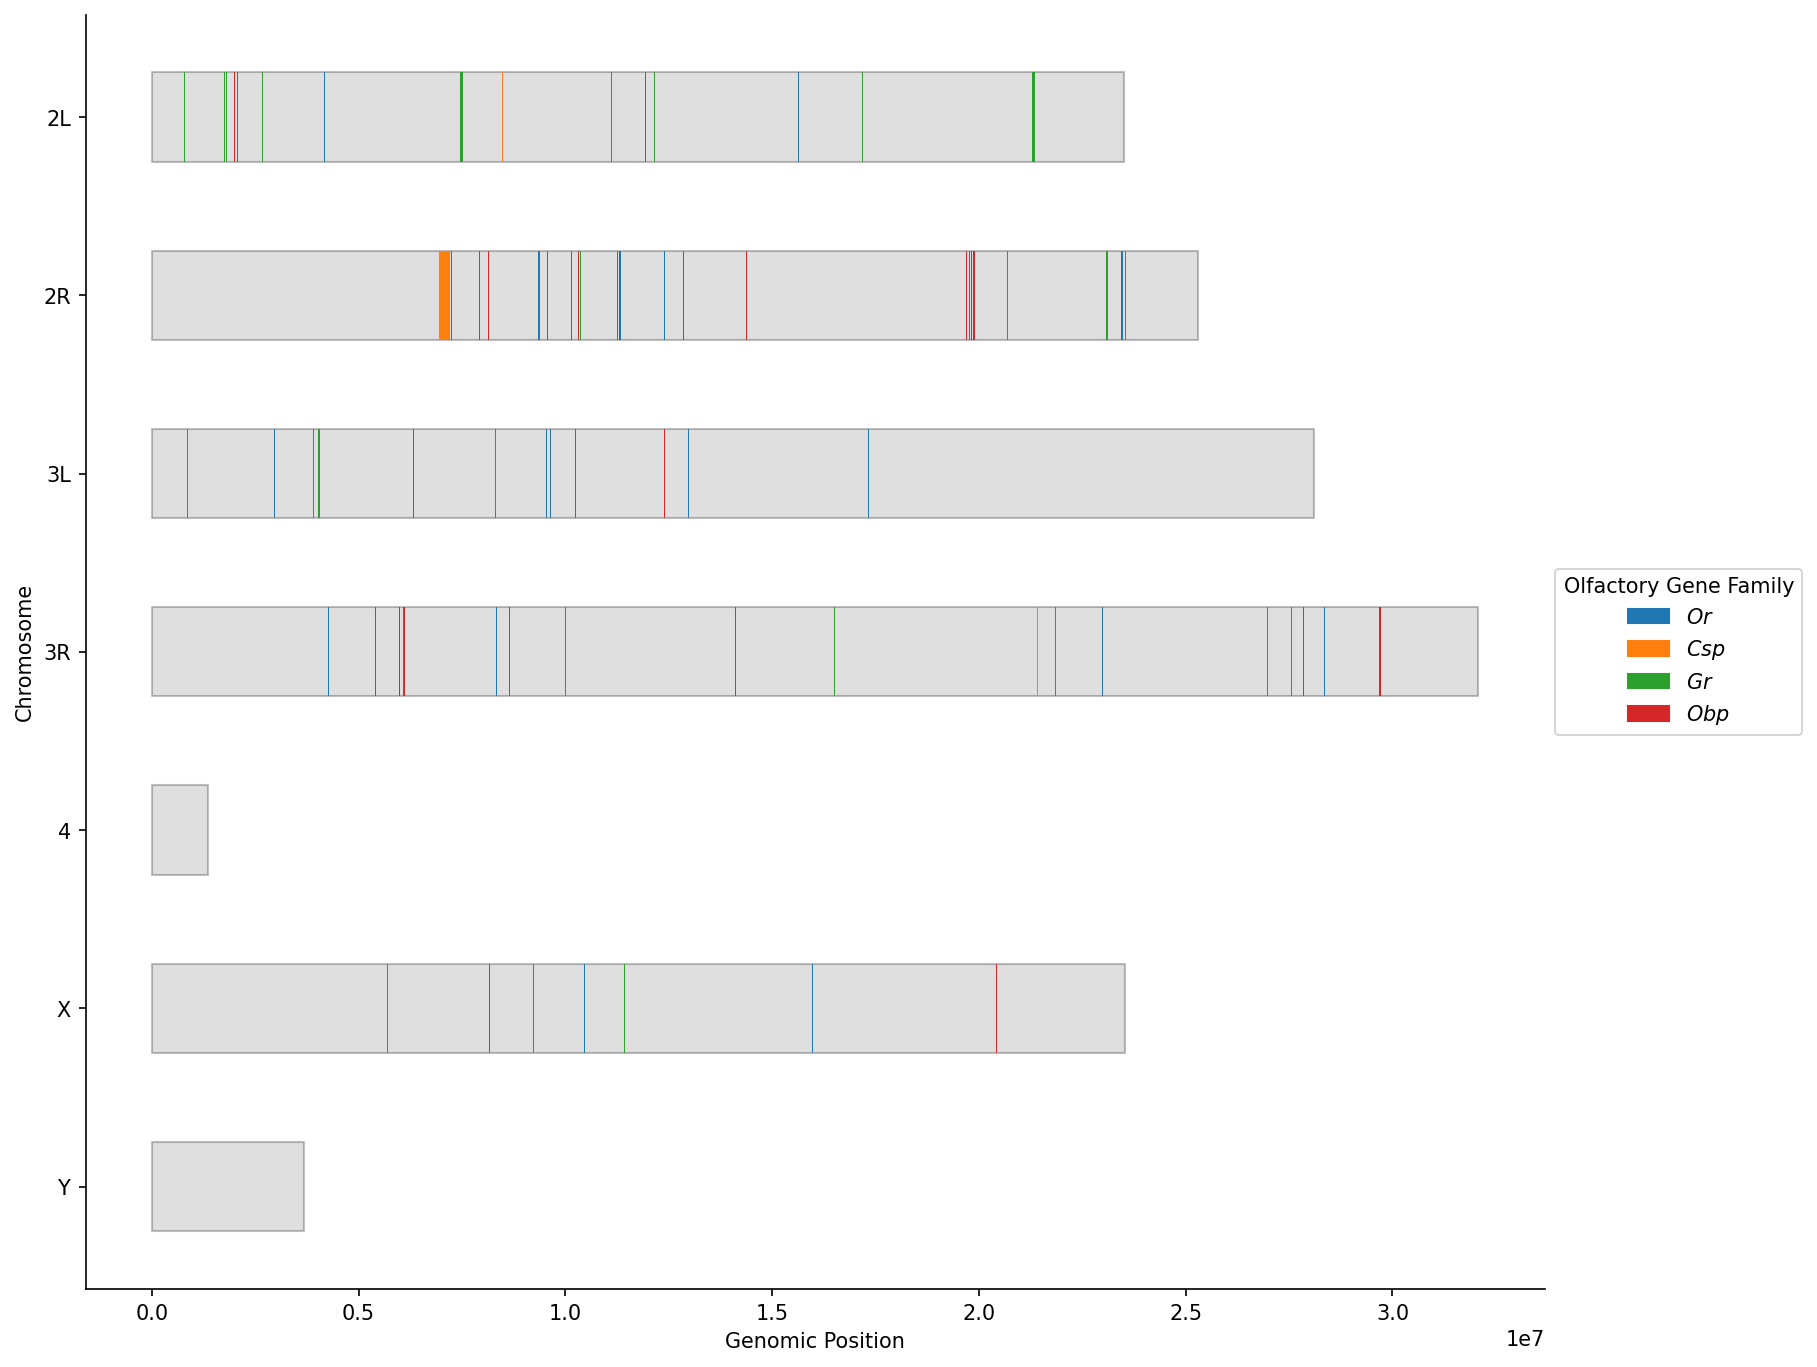

In [146]:
# Subset the dataframe for olfactory genes.
olfactory_df = omega_df[omega_df['type'] != 'genome']
# Intialize a dictionary for the genomic background.
genome_dicc = {
    'seqnames': ['2L', '2R', '3L', '3R', '4', 'X', 'Y'],
    'start': [0, 0, 0, 0, 0, 0, 0],
    'end': [23_513_712, 25_286_936, 28_110_227, 32_079_331, 1_348_131, 23_542_271, 3_667_352],
    'length': [23_513_712, 25_286_936, 28_110_227, 32_079_331, 1_348_131, 23_542_271, 3_667_352],
    'type': ['genome', 'genome', 'genome', 'genome', 'genome', 'genome', 'genome'],
    'colors': ['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'],
}
# Convert the dictionary to a dataframe.
genome_df = pd.DataFrame(data=genome_dicc)
# Height of each ideogram.
chrom_height = 1
# Spacing between consecutive ideograms.
chrom_spacing = 1
# Height of the gene track should be smaller than `chrom_spacing` in order to fit correctly.
gene_height = 0.4
# Padding between the top of a gene track and its corresponding ideogram.
gene_padding = 0.1
# Intialize a chromosome list.
chromosome_list = ['2L', '2R', '3L', '3R', '4', 'X', 'Y']
# Keep track of the y positions for ideograms and genes for each chromosome, and the center of each ideogram (which is where we'll put the ytick labels).
ybase = 0
chrom_ybase = {}
gene_ybase = {}
chrom_centers = {}
# Iterate in reverse so that items in the beginning of `chromosome_list` will appear at the top of the plot.
for chrom in chromosome_list[::-1]:
    chrom_ybase[chrom] = ybase
    chrom_centers[chrom] = ybase + chrom_height / 2.0
    gene_ybase[chrom] = ybase - gene_height - gene_padding
    ybase += chrom_height + chrom_spacing
# Intialize a dictionary for gene types.
color_lookup = {

    'Or': 'tab:blue',
    'Csp': 'tab:orange',
    'Gr': 'tab:green',
    'Obp': 'tab:red',
}
# Add a new column for colors.
olfactory_df['colors'] = olfactory_df['type'].apply(lambda x: color_lookup[x])
olfactory_df['length'] = olfactory_df['length'] * 10
# Intialize the figure.
fig = plt.figure(figsize=(12, 9), constrained_layout=True, facecolor='white', dpi=150.0)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the genomic background.
for collection in chromosome_collections(genome_df, chrom_ybase, chrom_height, alpha=0.25, edgecolor='black'):
    ax.add_collection(collection)
# Plot the olfactory genes.
for collection in chromosome_collections(olfactory_df, chrom_ybase, chrom_height):
    ax.add_collection(collection)
# Construct the legend.
or_patch = mpatches.Patch(color='tab:blue', label=r'$Or$')
csp_patch = mpatches.Patch(color='tab:orange', label=r'$Csp$')
gr_patch = mpatches.Patch(color='tab:green', label=r'$Gr$')
obp_patch = mpatches.Patch(color='tab:red', label=r'$Obp$')
ax.legend(handles=[or_patch, csp_patch, gr_patch, obp_patch], loc='center left', bbox_to_anchor=(1.0, 0.5), title='Olfactory Gene Family')
# Axes tweaking.
ax.set_yticks([chrom_centers[i] for i in chromosome_list])
ax.set_yticklabels(chromosome_list)
ax.axis('tight')
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set the axes label.
plt.xlabel('Genomic Position')
plt.ylabel('Chromosome')
#plt.savefig('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/figures/figure_4_ideogram.png', dpi=300)
plt.show()

## Figure 5. Omega

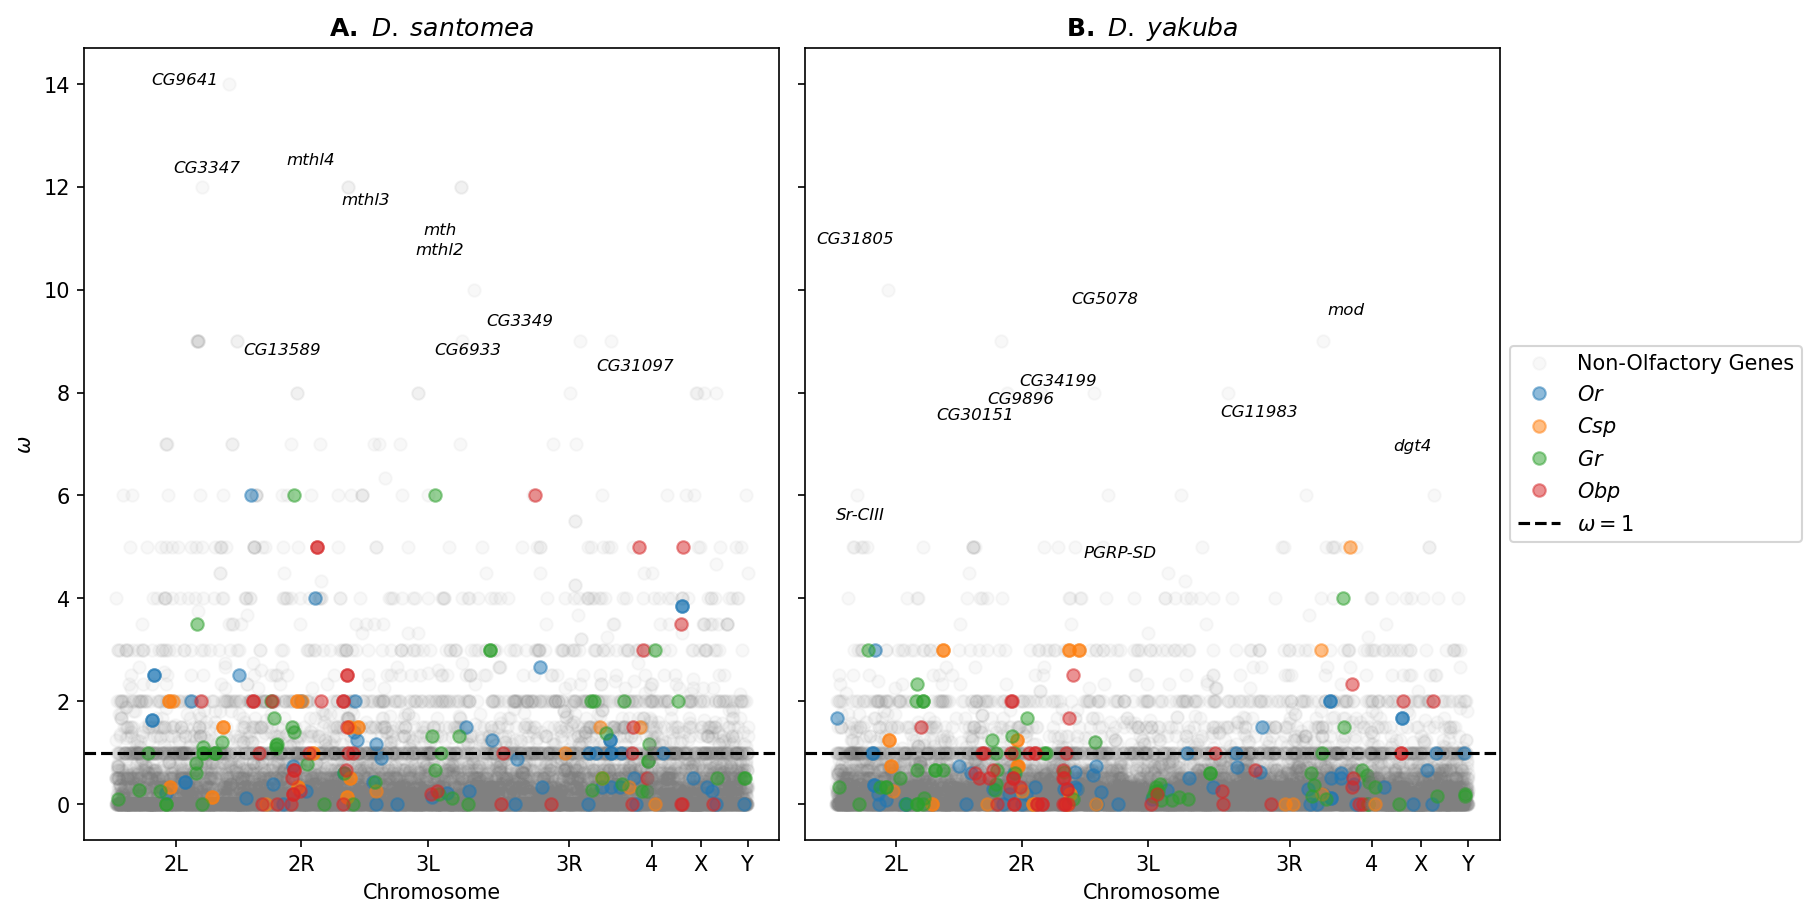

In [159]:
# Intialize the figure.
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=True, constrained_layout=True, dpi=150,)
# Intialize data for the manhattan plot.
x_labels_pos = []
chrom_idx = 0
genome_len = 0
# For every chromosome...
for chrom in chromosome_list:
    # Subset the dataframe.
    subset_df = omega_df[omega_df['seqnames'] == chrom].reset_index(drop=True)
    chrom_len = subset_df.end.values.size
    genome_len += chrom_len
    start_pos = genome_len - chrom_len
    end_pos = start_pos + chrom_len
    mid_pos = end_pos - ((end_pos - start_pos) / 2)
    genome_df = subset_df[subset_df['type'] == 'genome']
    or_df = subset_df[subset_df['type'] == 'Or']
    csp_df = subset_df[subset_df['type'] == 'Csp']
    gr_df = subset_df[subset_df['type'] == 'Gr']
    obp_df = subset_df[subset_df['type'] == 'Obp']
    # If this is the not last chromosome...
    if chrom != 'Y':
        # Plot the san results.
        axes[0].plot(
            np.arange(start_pos, end_pos)[genome_df.index.values], genome_df['omega_san'].values,
            ls='', marker='o', color='gray', alpha=0.05,
        )
        axes[0].plot(
            np.arange(start_pos, end_pos)[or_df.index.values], or_df['omega_san'].values,
            ls='', marker='o', color='tab:blue', alpha=0.5,
        )
        axes[0].plot(
            np.arange(start_pos, end_pos)[csp_df.index.values], csp_df['omega_san'].values,
            ls='', marker='o', color='tab:orange', alpha=0.5,
        )
        axes[0].plot(
            np.arange(start_pos, end_pos)[gr_df.index.values], gr_df['omega_san'].values,
            ls='', marker='o', color='tab:green', alpha=0.5,
        )
        axes[0].plot(
            np.arange(start_pos, end_pos)[obp_df.index.values], obp_df['omega_san'].values,
            ls='', marker='o', color='tab:red', alpha=0.5,
        )
        # Plot the yak results.
        axes[1].plot(
            np.arange(start_pos, end_pos)[genome_df.index.values], genome_df['omega_yak'].values,
            ls='', marker='o', color='gray', alpha=0.05,
        )
        axes[1].plot(
            np.arange(start_pos, end_pos)[or_df.index.values], or_df['omega_yak'].values,
            ls='', marker='o', color='tab:blue', alpha=0.5,
        )
        axes[1].plot(
            np.arange(start_pos, end_pos)[csp_df.index.values], csp_df['omega_yak'].values,
            ls='', marker='o', color='tab:orange', alpha=0.5,
        )
        axes[1].plot(
            np.arange(start_pos, end_pos)[gr_df.index.values], gr_df['omega_yak'].values,
            ls='', marker='o', color='tab:green', alpha=0.5,
        )
        axes[1].plot(
            np.arange(start_pos, end_pos)[obp_df.index.values], obp_df['omega_yak'].values,
            ls='', marker='o', color='tab:red', alpha=0.5,
        )
        chrom_idx += 1
        x_labels_pos.append(mid_pos)
    # Else...
    else:
        # Plot the san results.
        axes[0].plot(
            np.arange(start_pos, end_pos)[genome_df.index.values], genome_df['omega_san'].values,
            ls='', marker='o', color='gray', alpha=0.05,
        )
        axes[0].plot(
            np.arange(start_pos, end_pos)[or_df.index.values], or_df['omega_san'].values,
            ls='', marker='o', color='tab:blue', alpha=0.5,
        )
        axes[0].plot(
            np.arange(start_pos, end_pos)[csp_df.index.values], csp_df['omega_san'].values,
            ls='', marker='o', color='tab:orange', alpha=0.5,
        )
        axes[0].plot(
            np.arange(start_pos, end_pos)[gr_df.index.values], gr_df['omega_san'].values,
            ls='', marker='o', color='tab:green', alpha=0.5,
        )
        axes[0].plot(
            np.arange(start_pos, end_pos)[obp_df.index.values], obp_df['omega_san'].values,
            ls='', marker='o', color='tab:red', alpha=0.5,
        )
        # Plot the yak results with labels.
        axes[1].plot(
            np.arange(start_pos, end_pos)[genome_df.index.values], genome_df['omega_yak'].values,
            ls='', marker='o', color='gray', label='Non-Olfactory Genes', alpha=0.05,
        )
        axes[1].plot(
            np.arange(start_pos, end_pos)[or_df.index.values], or_df['omega_yak'].values,
            ls='', marker='o', color='tab:blue', label=r'$Or$', alpha=0.5,
        )
        axes[1].plot(
            np.arange(start_pos, end_pos)[csp_df.index.values], csp_df['omega_yak'].values,
            ls='', marker='o', color='tab:orange', label=r'$Csp$', alpha=0.5,
        )
        axes[1].plot(
            np.arange(start_pos, end_pos)[gr_df.index.values], gr_df['omega_yak'].values,
            ls='', marker='o', color='tab:green', label=r'$Gr$', alpha=0.5,
        )
        axes[1].plot(
            np.arange(start_pos, end_pos)[obp_df.index.values], obp_df['omega_yak'].values,
            ls='', marker='o', color='tab:red', label=r'$Obp$', alpha=0.5,
        )
        chrom_idx += 1
        x_labels_pos.append(mid_pos)
# Re-intialize the counters for the text.
chrom_idx = 0
genome_len = 0
# For every chromosome...
for chrom in chromosome_list:
    # Subset the dataframe.
    subset_df = omega_df[omega_df['seqnames'] == chrom].reset_index(drop=True)
    chrom_len = subset_df.end.values.size
    genome_len += chrom_len
    start_pos = genome_len - chrom_len
    end_pos = start_pos + chrom_len
    # Create a mask for the outlier genes.
    san_mask = np.isin(subset_df['symbol'].values, san_top_20_genes)
    yak_mask = np.isin(subset_df['symbol'].values, yak_top_20_genes)
    # Intialize the outlier dataframe.
    san_out_df = subset_df [san_mask][subset_df [san_mask]['omega_san'] >= np.min(san_top_20_omegas)]
    yak_out_df = subset_df [yak_mask][subset_df [yak_mask]['omega_yak'] >= np.min(yak_top_20_omegas)]
    # Extract the indicies.
    san_out_idx = san_out_df.index.values
    yak_out_idx = yak_out_df.index.values
    # intialize and index.
    idx = 0
    # For every san outlier...
    for out_idx in san_out_idx:
        axes[0].text(
            np.random.normal(np.arange(start_pos, end_pos)[out_idx], 500, size=1)[0],
            np.random.normal(san_out_df.loc[out_idx]['omega_san'], 0.65, size=1)[0],
            san_out_df.loc[out_idx]['symbol'],
            fontsize=8, style='italic', 
            va=['top', 'bottom', 'center'][idx],
            ha=['left', 'center', 'right'][idx],
        )
        idx += 1
        if idx == 3:
            idx = 0
    # intialize and index.
    idx = 0
    # For every yak outlier...
    for out_idx in yak_out_idx:
        axes[1].text(
            np.random.normal(np.arange(start_pos, end_pos)[out_idx], 500, size=1)[0],
            np.random.normal(yak_out_df.loc[out_idx]['omega_yak'], 0.65, size=1)[0],
            yak_out_df.loc[out_idx]['symbol'],
            fontsize=8, style='italic', 
            va=['top', 'bottom', 'center'][idx],
            ha=['left', 'center', 'right'][idx],
        )
        idx += 1
        if idx == 3:
            idx = 0
# Plot the threshold of 1.
axes[0].axhline(1, 0, 1, color='black', ls='dashed')
# Configure the axes.
axes[0].set_xlabel('Chromosome')
axes[0].set_xticks(x_labels_pos)
axes[0].set_xticklabels(chromosome_list)
axes[0].set_ylabel(r'$\omega$')
# Set the title.
axes[0].set_title(r'$\bf{A.}$'+' '+r'$D. \; santomea$')
# Plot the threshold of 1.
axes[1].axhline(1, 0, 1, color='black', ls='dashed', label=r'$\omega = 1$')
axes[1].set_xlabel('Chromosome')
axes[1].set_xticks(x_labels_pos)
axes[1].set_xticklabels(chromosome_list)
# Set the title.
axes[1].set_title(r'$\bf{B.}$'+' '+r'$D. \; yakuba$')
# Construct the legend.
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/figures/figure_5_omega.png', dpi=300)
plt.show()